In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby(['source']).sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,053,154","4,051,248"


# Total Persons - Pierce County

In [5]:
_df = df.rename(columns={'person_county':'County'}).groupby(['County','source'])['psexpfac'].sum()
_df[_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot(index='County', columns='source', values='psexpfac')

source,model,survey
County,,
Pierce,"851,709","850,387"


# Total Persons - Other Counties

In [6]:
_df[~_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot_table(index='County', columns='source', values='psexpfac', margins=True, aggfunc=sum).\
    drop('All',axis=1)

source,model,survey
County,,
King,"2,149,234","2,161,738"
Kitsap,"257,159","249,302"
Snohomish,"795,052","789,822"
All,"3,201,445","3,200,862"


# Total Households

In [7]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,605,263","1,656,512"


## Pierce County

In [8]:
df = load_data('auto_ownership')
_df = df.rename(columns={'hh_county':'County'}).groupby(['County','source'])['hhexpfac'].sum()
_df[_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot(index='County', columns='source', values='hhexpfac')

source,model,survey
County,,
Pierce,"323,804","339,240"


## Other Counties

In [9]:
_df = df.rename(columns={'hh_county':'County'}).groupby(['County','source'])['hhexpfac'].sum()
_df[~_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot_table(index='County', columns='source', values='hhexpfac', margins=True, aggfunc=sum).\
    drop('All',axis=1)

source,model,survey
County,,
King,"884,650","915,410"
Kitsap,"101,859","99,071"
Snohomish,"294,950","302,792"
All,"1,281,459","1,317,272"


# Total Trips

In [10]:
df = load_data('trip_total')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"16,331,152","15,766,214"


## Pierce County

In [11]:
_df = df.rename(columns={'person_county':'County'}).groupby(['County','source'])['trexpfac'].sum()
_df[_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot(index='County', columns='source', values='trexpfac')

source,model,survey
County,,
Pierce,"3,212,582","2,998,553"


## Other Counties

In [12]:
_df = df.rename(columns={'person_county':'County'}).groupby(['County','source'])['trexpfac'].sum()
_df[~_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot_table(index='County', columns='source', values='trexpfac', margins=True, aggfunc=sum).\
    drop('All',axis=1)

source,model,survey
County,,
King,"8,985,429","8,813,594"
Kitsap,"995,770","974,117"
Snohomish,"3,137,371","2,979,950"
All,"13,118,570","12,767,661"


# Total Tours

In [13]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"6,417,010","6,807,631"


## Pierce County

In [14]:
_df = df.rename(columns={'person_county':'County'}).groupby(['County','source'])['toexpfac'].sum()
_df[_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot(index='County', columns='source', values='toexpfac')

source,model,survey
County,,
Pierce,"1,266,129","1,334,376"


## Other Counties

In [15]:
_df = df.rename(columns={'person_county':'County'}).groupby(['County','source'])['toexpfac'].sum()
_df[~_df.index.get_level_values(0).isin(['Pierce'])].reset_index().pivot_table(index='County', columns='source', values='toexpfac', margins=True, aggfunc=sum).\
    drop('All',axis=1)

source,model,survey
County,,
King,"3,526,958","3,663,281"
Kitsap,"391,259","502,309"
Snohomish,"1,232,664","1,307,664"
All,"5,150,881","5,473,255"


## Average Household Size

In [16]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.52
survey,2.45


## Pierce County

In [17]:
for county, df_county in df.groupby('person_county'):
    if county=='Pierce':
        print(county + ' County')
        print(pd.DataFrame(
        df_county.groupby('source').apply(
            lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
            columns=['avg_hh_size']))

Pierce County
        avg_hh_size
source             
model          2.63
survey         2.51


## Other Counties

In [18]:
for county, df_county in df.groupby('person_county'):
    if county!='Pierce':
        print(county + ' County')
        print(pd.DataFrame(
        df_county.groupby('source').apply(
            lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
            columns=['avg_hh_size']))

King County
        avg_hh_size
source             
model          2.43
survey         2.36
Kitsap County
        avg_hh_size
source             
model          2.52
survey         2.52
Snohomish County
        avg_hh_size
source             
model          2.70
survey         2.61


## Average Trips per Person

## Average Distance to Work

In [19]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean().pivot_table(index=['mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)

travcost        travdist        travtime       
source        model survey    model survey    model survey
mode                                                      
Bike           0.00   0.00     5.49   3.26    36.58  19.56
HOV2           2.33   0.45    10.04   7.19    22.25  18.29
HOV3+          2.46   1.46    10.44  11.30    22.86  23.80
SOV            2.14   0.18    10.09   9.04    22.44  20.36
School Bus     0.52   0.00     2.56   3.91     9.58  11.61
TNC            0.50   0.01     2.40   9.70    10.00  20.37
Transit        1.99   4.75    13.77  14.47    53.97 154.27
Walk           0.00   0.00     0.71   1.34    14.14  26.96

## Pierce County

In [20]:
_df = df[df['dpurp'] == 'Work'].rename(columns={'person_county':'County'}).groupby(['County','mode','source']).mean()
_df[_df.index.get_level_values(0).isin(['Pierce'])].pivot_table(index=['County','mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)

travcost        travdist        travtime       
source               model survey    model survey    model survey
County mode                                                      
Pierce Bike           0.00   0.00     5.52   3.51    36.83  21.08
       HOV2           2.34   0.10    11.38   6.92    24.42  16.64
       HOV3+          2.43   0.31    11.80   5.43    25.05  15.21
       SOV            2.33   0.15    11.41  10.02    24.96  22.50
       School Bus     0.39    NaN     1.93    NaN     9.85    NaN
       TNC            0.55   0.00     2.68  29.08    10.56  39.96
       Transit        2.18   5.01    18.68  25.02    60.89  65.68
       Walk           0.00   0.00     0.76   0.61    15.19  12.24

## Other Counties

In [21]:
_df[~_df.index.get_level_values(0).isin(['Pierce'])].pivot_table(index=['County','mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)

travcost        travdist        travtime       
source                  model survey    model survey    model survey
County    mode                                                      
King      Bike           0.00   0.00     5.11   3.49    34.09  20.97
          HOV2           1.82   0.17     8.50   6.60    20.25  17.14
          HOV3+          1.87   0.27     8.69   7.49    20.42  17.76
          SOV            1.81   0.14     8.71   7.90    21.14  19.18
          School Bus     0.88   0.00     4.38   3.91    12.30  11.61
          TNC            0.49   0.05     2.31   3.91    10.80  15.67
          Transit        1.22   2.80     9.08   6.16    37.48  23.12
          Walk           0.00   0.00     0.66   0.76    13.26  15.20
Kitsap    Bike           0.00   0.00     5.15   3.88    34.31  23.33
          HOV2           2.82   1.53     8.94   7.00    20.21  18.54
          HOV3+          3.16   5.27     9.53  23.25    21.53  43.63
          SOV            2.06   0.39     8.63   7.84    18.35  17.19
          School Bus     0.20    NaN     1.01    NaN     5.25    NaN
          TNC            0.41   0.00     1.86   1.71     8.49  13.36
          Transit        2.35   5.47    15.02  12.48    71.41 483.81
          Walk           0.00   0.00     0.64   2.93    12.79  58.70
Snohomish Bike           0.00   0.00     6.17   2.14    41.11  12.85
          HOV2           2.37   0.00    11.36   8.25    24.11  20.84
          HOV3+          2.38   0.00    11.72   9.01    24.44  18.59
          SOV            2.35   0.05    11.63  10.41    25.30  22.57
          School Bus     0.61    NaN     2.92    NaN    10.91    NaN
          TNC            0.55   0.00     2.75   4.09    10.15  12.50
          Transit        2.19   5.72    12.27  14.22    46.11  44.45
          Walk           0.00   0.00     0.77   1.08    15.31  21.71

## Average Distance to School

In [22]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean().pivot_table(index=['mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)

travcost        travdist        travtime       
source        model survey    model survey    model survey
mode                                                      
Bike           0.00   0.00     2.95   1.44    19.65   8.64
HOV2           0.68   0.05     3.28   4.07    10.37  12.08
HOV3+          0.70   0.00     3.38   4.71    10.56  12.77
SOV            1.42   0.26     6.55   7.98    16.21  20.94
School Bus     0.63   0.00     3.12   2.72    10.16   9.27
TNC            0.47   0.18     2.32   3.22     8.86  15.08
Transit        0.43   4.21     6.49  10.18    42.03  29.29
Walk           0.00   0.00     1.34   0.84    26.88  16.84

## Pierce County

In [23]:
_df = df[df['dpurp'] == 'School'].rename(columns={'person_county':'County'}).groupby(['County','mode','source']).mean()
_df[_df.index.get_level_values(0).isin(['Pierce'])].pivot_table(index=['County','mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)

travcost        travdist        travtime       
source               model survey    model survey    model survey
County mode                                                      
Pierce Bike           0.00    NaN     3.06    NaN    20.40    NaN
       HOV2           0.69   0.12     3.31   3.51    10.72  11.99
       HOV3+          0.72   0.00     3.43   6.64    10.97  16.90
       SOV            1.43   0.17     6.34   7.05    16.11  19.20
       School Bus     0.66   0.00     3.21   3.30    10.63  10.66
       TNC            0.50    NaN     2.41    NaN     9.25    NaN
       Transit        0.33   4.12     4.94  14.08    39.46  34.27
       Walk           0.00   0.00     1.41   0.99    28.27  20.00

## Other Counties

In [24]:
_df[~_df.index.get_level_values(0).isin(['Pierce'])].pivot_table(index=['County','mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False)

travcost        travdist        travtime       
source                  model survey    model survey    model survey
County    mode                                                      
King      Bike           0.00   0.00     2.76   1.44    18.40   8.64
          HOV2           0.65   0.07     3.24   3.30    10.74  10.92
          HOV3+          0.68   0.01     3.35   3.03    10.96  10.48
          SOV            1.16   0.14     5.76   6.10    15.55  17.37
          School Bus     0.63   0.00     3.14   2.84    10.63   9.56
          TNC            0.47   0.18     2.36   3.22     9.58  15.08
          Transit        0.33   2.75     5.66   3.91    35.02  13.10
          Walk           0.00   0.00     1.32   0.81    26.44  16.25
Kitsap    Bike           0.00    NaN     2.78    NaN    18.55    NaN
          HOV2           0.71   0.00     3.20   3.92     9.76  11.23
          HOV3+          0.71   0.00     3.26   4.12     9.83  10.77
          SOV            1.60   0.74     6.74  11.09    15.91  28.86
          School Bus     0.61   0.00     3.01   2.15     9.42   8.45
          TNC            0.43    NaN     2.14    NaN     8.15    NaN
          Transit        0.53    NaN     7.87    NaN    49.66    NaN
          Walk           0.00   0.00     1.25   0.83    24.91  16.70
Snohomish Bike           0.00    NaN     3.19    NaN    21.25    NaN
          HOV2           0.67   0.00     3.36   5.55    10.25  14.18
          HOV3+          0.70   0.00     3.49   5.05    10.47  12.94
          SOV            1.47   0.00     7.34   7.67    17.27  18.31
          School Bus     0.63   0.00     3.15   2.58     9.94   8.42
          TNC            0.47    NaN     2.35    NaN     8.47    NaN
          Transit        0.52   5.75     7.47  12.56    43.97  40.51
          Walk           0.00   0.00     1.39   0.72    27.89  14.43

## Transit Pass Ownership

In [25]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,291,944","3,264,963"
1,"761,210","786,285"


## Pierce County

In [26]:
_df = df.rename(columns={'person_county':'County'})
_df[_df.County.isin(['Pierce'])].pivot_table(index=['County','ptpass'], columns='source', values=['psexpfac'], margins=False, aggfunc=sum)

psexpfac        
source           model  survey
County ptpass                 
Pierce 0       731,102 750,552
       1       120,607  99,835

## Other Counties

In [27]:
_df[~_df.County.isin(['Pierce'])].pivot_table(index=['County','ptpass'], columns='source', values=['psexpfac'], margins=False, aggfunc=sum)

psexpfac          
source               model    survey
County    ptpass                    
King      0      1,652,472 1,640,725
          1        496,762   521,013
Kitsap    0        228,740   208,537
          1         28,419    40,765
Snohomish 0        679,630   665,149
          1        115,422   124,673

In [28]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 5-15,"2,053","9,796"
Full-Time Worker,"487,962","709,233"
High School Student Age 16+,"128,439","5,549"
Non-Working Adult Age 65+,367,329
Non-Working Adult Age <65,"17,971",NaN
Part-Time Worker,"41,782","44,097"
University Student,"82,636","15,414"


## Pierce County

In [29]:
_df = df[df['ptpass']==1].rename(columns={'person_county':'County'})
_df[_df.County.isin(['Pierce'])].pivot_table(index=['County','pptyp'], columns='source', values=['psexpfac'], margins=False, aggfunc=sum)

psexpfac       
source                                model survey
County pptyp                                      
Pierce Child Age 5-15                   398  1,057
       Full-Time Worker              69,813 81,620
       High School Student Age 16+   26,686    484
       Non-Working Adult Age 65+          7    NaN
       Non-Working Adult Age <65      3,763    NaN
       Part-Time Worker               5,478 13,971
       University Student            14,462  1,478

## Other Counties

In [30]:
_df[~_df.County.isin(['Pierce'])].pivot_table(index=['County','pptyp'], columns='source', values=['psexpfac'], margins=False, aggfunc=sum)

psexpfac        
source                                   model  survey
County    pptyp                                       
King      Child Age 5-15                 1,152   8,738
          Full-Time Worker             332,060 476,975
          High School Student Age 16+   68,367   4,321
          Non-Working Adult Age 65+        353     329
          Non-Working Adult Age <65     10,495     NaN
          Part-Time Worker              29,819  18,894
          University Student            54,516  11,112
Kitsap    Child Age 5-15                   145     NaN
          Full-Time Worker              16,000  36,033
          High School Student Age 16+    7,465     744
          Non-Working Adult Age <65        913     NaN
          Part-Time Worker               1,362   3,988
          University Student             2,534     NaN
Snohomish Child Age 5-15                   358     NaN
          Full-Time Worker              70,089 114,605
          High School Student Age 16+   25,921     NaN
          Non-Working Adult Age 65+          7     NaN
          Non-Working Adult Age <65      2,800     NaN
          Part-Time Worker               5,123   7,244
          University Student            11,124   2,824

# Auto Ownership

In [31]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'
df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

source,model,survey
hhvehs,,
0.0,"106,518","129,688"
1.0,"486,772","512,273"
2.0,"584,291","624,897"
3+,"427,682","389,654"


In [32]:
df1 = df[df['hh_county'] == 'Pierce']
print('Auto Ownership for Pierce County')
df1.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

Auto Ownership for Pierce County


source,model,survey
hhvehs,,
0.0,"16,019","18,385"
1.0,"94,430","92,906"
2.0,"122,680","130,704"
3+,"90,675","97,244"


In [33]:
df2 = df[df['hh_county'] != 'Pierce']
print('Auto Ownership for Other Counties')
df2.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

Auto Ownership for Other Counties


source,model,survey
hhvehs,,
0.0,"90,499","111,303"
1.0,"392,342","419,367"
2.0,"461,611","494,193"
3+,"337,007","292,410"


## By Income

In [34]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
0.0    model   52,024   22,807   11,347    3,408  16,921
       survey  64,043   27,901   17,279        0  20,465
1.0    model  116,484  106,619   81,734   29,549 152,290
       survey 138,715  102,527  110,953        0 160,079
2.0    model   32,662   59,021   78,037   38,516 376,046
       survey  90,579   85,436   77,247        0 371,635
3.0    model    8,237   16,648   30,511   16,521 225,056
       survey  46,917   19,832   22,998        0 177,643
4+     model    3,313    6,909   11,143    5,830 103,505
       survey   9,063      759   13,427        0  99,015

In [35]:
df1 = df[df['hh_county'] == 'Pierce']

print('Income summaries for Pierce County')
pd.pivot_table(df1, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

Income summaries for Pierce County


income_bin     0-$20k  $20-40k  $40-60k  $60-75k  >$75k
hhvehs source                                          
0.0    model    8,761    3,929    1,742      451  1,136
       survey  10,975    7,008      355        0     47
1.0    model   28,180   25,616   16,459    5,818 18,357
       survey  32,297   24,398   15,822        0 20,390
2.0    model    9,294   16,330   20,320   10,328 66,408
       survey  13,939   27,281   27,940        0 61,544
3.0    model    2,336    4,576    7,811    4,494 43,503
       survey   7,054    8,043    6,145        0 51,027
4+     model      978    1,897    2,852    1,548 20,680
       survey   2,044       72    4,330        0 18,529

In [36]:
df2 = df[df['hh_county'] != 'Pierce']

print('Income summaries for Other Counties')
pd.pivot_table(df2, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

Income summaries for Other Counties


income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
0.0    model   43,263   18,878    9,605    2,957  15,785
       survey  53,068   20,893   16,924        0  20,418
1.0    model   88,304   81,003   65,275   23,731 133,933
       survey 106,418   78,129   95,131        0 139,690
2.0    model   23,368   42,691   57,717   28,188 309,638
       survey  76,640   58,156   49,307        0 310,090
3.0    model    5,901   12,072   22,700   12,027 181,553
       survey  39,864   11,789   16,853        0 126,616
4+     model    2,335    5,012    8,291    4,282  82,825
       survey   7,018      687    9,096        0  80,486

In [37]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

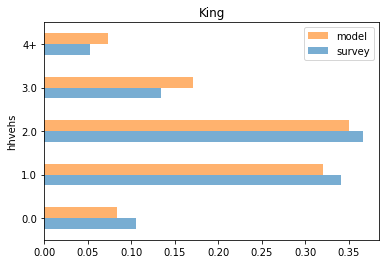

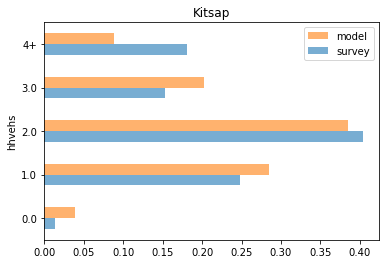

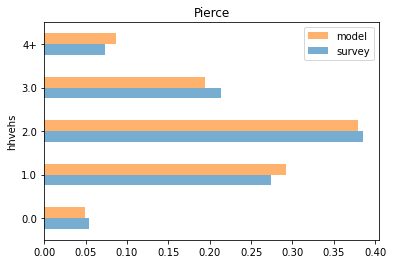

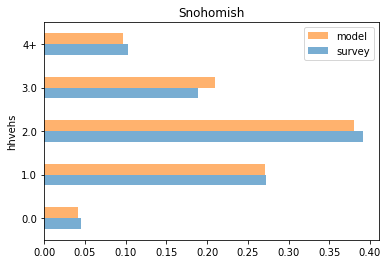

In [38]:
for county in df['hh_county'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County
Model

In [39]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format
df.rename(columns={'person_county': 'Home County', 'person_work_county':'Work County'}, inplace=True)

pd.pivot_table(df[df['source'] == 'model'], index='Home County', columns='Work County', aggfunc='sum')

psexpfac                         
Work County      King Kitsap  Pierce Snohomish
Home County                                   
King        1,015,766    622  36,311    37,635
Kitsap          9,037 92,517   7,969        89
Pierce        106,124  8,047 231,311       495
Snohomish     152,176    112     615   220,472